# Flight Delay Analysis - Data Preprocessing

## Phase 2: Data Cleaning

In [21]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Import preprocessing functions
from src.data.preprocessing import (
    remove_invalid_rows,
    handle_missing_values,
    remove_duplicates,
    validate_data_types,
    handle_outliers,
    preprocessing_pipeline
)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✓ Imports complete")

✓ Imports complete


In [22]:
# Reload external files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## Part 1: Data Preprocessing
---

### 1.1 Load Raw Data

In [23]:
# Load the combined dataset
input_path = '../data/processed/flight_delays_combined.csv'
df_raw = pd.read_csv(input_path)

print(f"Raw data shape: {df_raw.shape}")
print(f"Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nFirst few rows:")
df_raw.head()

Raw data shape: (1527171, 17)
Memory usage: 668.46 MB

First few rows:


,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,9E,01/01/2019,3280.0,N8688C,GNV,07:23,07:22,83.0,81.0,-1.0,07:14,8.0,0.0,0.0,0.0,0.0,0.0
1,9E,01/01/2019,3283.0,N8886A,TLH,16:39,16:25,72.0,64.0,-14.0,16:18,7.0,0.0,0.0,0.0,0.0,0.0
2,9E,01/01/2019,3286.0,N915XJ,JAN,18:23,18:32,85.0,99.0,9.0,18:18,14.0,0.0,0.0,0.0,0.0,0.0
3,9E,01/01/2019,3289.0,N311PQ,BMI,17:07,17:00,112.0,110.0,-7.0,16:55,5.0,0.0,0.0,0.0,0.0,0.0
4,9E,01/01/2019,3290.0,N931XJ,CAK,08:09,07:37,129.0,100.0,-32.0,07:31,6.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Initial data quality check
print("=" * 60)
print("INITIAL DATA QUALITY")
print("=" * 60)

print(f"\nTotal rows: {len(df_raw):,}")
print(f"Total columns: {len(df_raw.columns)}")
print(f"Missing values: {df_raw.isna().sum().sum():,}")
print(f"Duplicate rows: {df_raw.duplicated().sum():,}")

# Show which columns have missing values
print(f"\nColumns with missing values:")
missing = df_raw.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
for col, count in missing.items():
    print(f"  - {col}: {count:,} ({count/len(df_raw)*100:.4f}%)")

# Data types
print(f"\nData types:")
dtype_counts = df_raw.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  {str(dtype):<20} {count:>3} columns")

INITIAL DATA QUALITY

Total rows: 1,527,171
Total columns: 17
Missing values: 1,244
Duplicate rows: 10

Columns with missing values:
  - Tail Number: 1,079 (0.0707%)
  - Date (MM/DD/YYYY): 11 (0.0007%)
  - Flight Number: 11 (0.0007%)
  - Origin Airport: 11 (0.0007%)
  - Scheduled Arrival Time: 11 (0.0007%)
  - Actual Arrival Time: 11 (0.0007%)
  - Scheduled Elapsed Time (Minutes): 11 (0.0007%)
  - Actual Elapsed Time (Minutes): 11 (0.0007%)
  - Arrival Delay (Minutes): 11 (0.0007%)
  - Wheels-on Time: 11 (0.0007%)
  - Taxi-In time (Minutes): 11 (0.0007%)
  - Delay Carrier (Minutes): 11 (0.0007%)
  - Delay Weather (Minutes): 11 (0.0007%)
  - Delay National Aviation System (Minutes): 11 (0.0007%)
  - Delay Security (Minutes): 11 (0.0007%)
  - Delay Late Aircraft Arrival (Minutes): 11 (0.0007%)

Data types:
  float64               10 columns
  object                 7 columns


### 1.2 Run Preprocessing Pipeline

In [25]:
# Run the complete preprocessing pipeline
output_path_clean = '../data/processed/flight_delays_cleaned.csv'

df_clean = preprocessing_pipeline(
    input_path=input_path,
    output_path=output_path_clean,
    remove_invalid=True,
    handle_missing=True,
    remove_dupes=True,
    validate_dtypes=True,
    handle_outliers_method='keep',  # Keep outliers - Random Forest is robust
    date_range=None
)

print(f"\n✓ Preprocessing complete!")


STARTING DATA PREPROCESSING PIPELINE

Loading data from: ../data/processed/flight_delays_combined.csv
✓ Loaded 1,527,171 rows, 17 columns
✓ Created in-memory canonical date column 'Date (YYYY-MM-DD)' from legacy header and dropped legacy column
✓ Moved 'Date (YYYY-MM-DD)' to column position 2 (in-memory)

REMOVING INVALID ROWS
✓ Removed 11 rows with 15 critical columns missing (0.0007%)
✓ Remaining: 1,527,160 rows

HANDLING MISSING VALUES
Initial missing values: 1,068
  - Tail Number: Filled 1068 values with 'Unknown'

✓ Final missing values: 0
✓ Reduced missing values by 1,068

REMOVING DUPLICATES
✓ Removed 0 duplicate rows (0.00%)
✓ Remaining: 1,527,160 rows

VALIDATING DATA TYPES
✓ Converted 'Flight Number' from float64 to Int32
✓ Converted 'Scheduled Elapsed Time (Minutes)' from float64 to Int16
✓ Converted 'Actual Elapsed Time (Minutes)' from float64 to Int16
✓ Converted 'Arrival Delay (Minutes)' from float64 to Int16
✓ Converted 'Taxi-In time (Minutes)' from float64 to Int16
✓ C

## 3. Validate Preprocessing Results

In [28]:
# Validate cleaned data
print("\n" + "=" * 60)
print("PREPROCESSING VERIFICATION")
print("=" * 60)

# Check rows removed
rows_removed = len(df_raw) - len(df_clean)
print(f"\nRows removed: {rows_removed:,} ({rows_removed/len(df_raw)*100:.4f}%)")
print(f"Expected: 11 rows (those with all critical columns missing)")

# Check Tail Number
tail_unknown = (df_clean['Tail Number'] == 'Unknown').sum()
tail_total = len(df_clean['Tail Number'])
print(f"\nTail Number:")
print(f"  - 'Unknown' count: {tail_unknown:,} ({tail_unknown/tail_total*100:.2f}%)")
print(f"  - Expected: ~1,079")
print(f"  - Unique values: {df_clean['Tail Number'].nunique():,}")

# Check missing values
missing_total = df_clean.isna().sum().sum()
print(f"\nTotal missing values: {missing_total:,}")
print(f"Expected: 0")

# Check specific columns
print(f"\nMissing values by column:")
missing_cols = df_clean.isna().sum()
missing_cols = missing_cols[missing_cols > 0]
if len(missing_cols) == 0:
    print("  ✓ No missing values found!")
else:
    for col, count in missing_cols.items():
        print(f"  - {col}: {count:,}")

# Check duplicates
duplicates = df_clean.duplicated().sum()
print(f"\nDuplicate rows: {duplicates:,}")
print(f"Expected: 0")


PREPROCESSING VERIFICATION

Rows removed: 11 (0.0007%)
Expected: 11 rows (those with all critical columns missing)

Tail Number:
  - 'Unknown' count: 1,068 (0.07%)
  - Expected: ~1,079
  - Unique values: 5,150

Total missing values: 0
Expected: 0

Missing values by column:
  ✓ No missing values found!

Duplicate rows: 0
Expected: 0


In [27]:
# Final data summary
print("\n" + "=" * 60)
print("CLEANED DATA SUMMARY")
print("=" * 60)

print(f"\nShape: {df_clean.shape}")
print(f"  - Rows: {len(df_clean):,}")
print(f"  - Columns: {len(df_clean.columns)}")

print(f"\nMemory usage:")
print(f"  - Before: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"  - After:  {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"  - Saved:  {(df_raw.memory_usage(deep=True).sum() - df_clean.memory_usage(deep=True).sum()) / 1024**2:.2f} MB")

print(f"\nData types:")
dtype_counts = df_clean.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  {str(dtype):<20} {count:>3} columns")

print(f"\nDate range:")
print(f"  - Min: {df_clean['Date (YYYY-MM-DD)'].min()}")
print(f"  - Max: {df_clean['Date (YYYY-MM-DD)'].max()}")


CLEANED DATA SUMMARY

Shape: (1527160, 17)
  - Rows: 1,527,160
  - Columns: 17

Memory usage:
  - Before: 668.46 MB
  - After:  390.32 MB
  - Saved:  278.14 MB

Data types:
  Int16                  9 columns
  string                 4 columns
  category               1 columns
  datetime64[ns]         1 columns
  Int32                  1 columns
  category               1 columns

Date range:
  - Min: 2019-01-01 00:00:00
  - Max: 2025-07-31 00:00:00


In [29]:
# Display sample of cleaned data
print("\n" + "=" * 60)
print("SAMPLE OF CLEANED DATA")
print("=" * 60)
print("\nFirst 10 rows:")
display(df_clean.head(10))

print("\nLast 10 rows:")
display(df_clean.tail(10))

print("\nRandom sample of 10 rows:")
display(df_clean.sample(10, random_state=42))


SAMPLE OF CLEANED DATA

First 10 rows:


,Carrier Code,Date (YYYY-MM-DD),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,9E,2019-01-01,3280,N8688C,GNV,07:23,07:22,83,81,-1,07:14,8,0,0,0,0,0
1,9E,2019-01-01,3283,N8886A,TLH,16:39,16:25,72,64,-14,16:18,7,0,0,0,0,0
2,9E,2019-01-01,3286,N915XJ,JAN,18:23,18:32,85,99,9,18:18,14,0,0,0,0,0
3,9E,2019-01-01,3289,N311PQ,BMI,17:07,17:00,112,110,-7,16:55,5,0,0,0,0,0
4,9E,2019-01-01,3290,N931XJ,CAK,08:09,07:37,129,100,-32,07:31,6,0,0,0,0,0
5,9E,2019-01-01,3296,N8970D,AGS,13:04,12:36,68,48,-28,12:28,8,0,0,0,0,0
6,9E,2019-01-01,3298,N931XJ,LIT,17:52,17:48,87,85,-4,17:42,6,0,0,0,0,0
7,9E,2019-01-01,3301,N8928A,GNV,19:14,19:03,89,83,-11,18:52,11,0,0,0,0,0
8,9E,2019-01-01,3302,N371CA,EYW,15:27,15:32,112,120,5,15:19,13,0,0,0,0,0
9,9E,2019-01-01,3304,N918XJ,CAE,09:34,09:14,79,67,-20,09:06,8,0,0,0,0,0



Last 10 rows:


,Carrier Code,Date (YYYY-MM-DD),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
1527160,YX,2022-12-31,4467,N126HQ,DCA,10:29,10:26,131,134,-3,10:14,12,0,0,0,0,0
1527161,YX,2022-12-31,4515,N138HQ,MIA,14:09,14:07,127,127,-2,13:43,24,0,0,0,0,0
1527162,YX,2022-12-31,4609,N453YX,LGA,11:16,11:01,169,164,-15,10:47,14,0,0,0,0,0
1527163,YX,2023-12-31,3532,N766YX,EWR,18:44,20:24,164,0,0,20:18,6,0,0,0,0,0
1527164,YX,2023-12-31,3635,N861RW,EWR,11:53,11:18,173,142,-35,11:05,13,0,0,0,0,0
1527165,YX,2023-12-31,4277,N418YX,PHL,21:14,20:42,152,127,-32,20:35,7,0,0,0,0,0
1527166,YX,2023-12-31,4503,N121HQ,DCA,10:35,10:15,137,119,-20,10:07,8,0,0,0,0,0
1527167,YX,2023-12-31,4682,N116HQ,DCA,16:08,16:06,130,106,-2,15:59,7,0,0,0,0,0
1527168,YX,2024-12-31,3459,N748YX,EWR,17:09,16:48,160,141,-21,16:40,8,0,0,0,0,0
1527169,YX,2024-12-31,4426,N127HQ,DCA,10:37,10:07,138,120,-30,09:59,8,0,0,0,0,0



Random sample of 10 rows:


,Carrier Code,Date (YYYY-MM-DD),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
1354009,UA,2022-11-23,2075,N12754,IAH,13:00,12:37,120,105,-23,12:27,10,0,0,0,0,0
1004811,DL,2023-10-05,1610,N539US,MCO,11:37,11:32,92,94,-5,11:23,9,0,0,0,0,0
925491,DL,2019-09-04,2494,N67171,FLL,16:57,17:00,112,118,3,16:46,14,0,0,0,0,0
279871,DL,2025-02-05,1093,N331DN,RSW,18:44,18:26,112,101,-18,18:20,6,0,0,0,0,0
1230680,NK,2022-03-02,251,N615NK,CLE,09:15,09:06,115,107,-9,08:57,9,0,0,0,0,0
1144009,DL,2024-11-30,1184,N855DN,OKC,08:32,08:11,122,104,-21,08:06,5,0,0,0,0,0
203284,DL,2024-01-09,1739,N896AT,MDW,19:58,20:36,118,136,38,20:32,4,0,0,18,0,20
1243196,NK,2024-05-27,1082,N641NK,MSP,13:40,13:25,152,141,-15,13:14,11,0,0,0,0,0
458887,DL,2022-04-06,2111,N948AT,AVL,19:20,20:07,67,66,47,19:59,8,47,0,0,0,0
1187860,DL,2022-12-18,1628,N3768,CHS,08:29,08:11,78,62,-18,08:07,4,0,0,0,0,0


In [19]:
# Check critical columns
print("\n" + "=" * 60)
print("CRITICAL COLUMNS CHECK")
print("=" * 60)

# Carrier Code
print(f"\nCarrier Code:")
print(f"  - Unique carriers: {df_clean['Carrier Code'].nunique()}")
print(f"  - Distribution:")
carrier_dist = df_clean['Carrier Code'].value_counts()
for carrier, count in carrier_dist.items():
    print(f"    {carrier}: {count:,} ({count/len(df_clean)*100:.2f}%)")

# Origin Airport
print(f"\nOrigin Airport:")
print(f"  - Unique airports: {df_clean['Origin Airport'].nunique()}")
print(f"  - Top 10 airports:")
top_airports = df_clean['Origin Airport'].value_counts().head(10)
for airport, count in top_airports.items():
    print(f"    {airport}: {count:,}")

# Arrival Delay
print(f"\nArrival Delay (Minutes):")
delay_stats = df_clean['Arrival Delay (Minutes)'].describe()
print(delay_stats)
print(f"\nDelayed flights (>15 min): {(df_clean['Arrival Delay (Minutes)'] > 15).sum():,} ({(df_clean['Arrival Delay (Minutes)'] > 15).mean()*100:.2f}%)")
print(f"On-time flights (≤15 min): {(df_clean['Arrival Delay (Minutes)'] <= 15).sum():,} ({(df_clean['Arrival Delay (Minutes)'] <= 15).mean()*100:.2f}%)")


CRITICAL COLUMNS CHECK

Carrier Code:
  - Unique carriers: 11
  - Distribution:
    DL: 1,038,169 (67.98%)
    WN: 155,106 (10.16%)
    9E: 135,294 (8.86%)
    OO: 57,206 (3.75%)
    NK: 48,865 (3.20%)
    AA: 39,905 (2.61%)
    UA: 27,981 (1.83%)
    YX: 15,702 (1.03%)
    AS: 4,968 (0.33%)
    MQ: 3,482 (0.23%)
    EV: 482 (0.03%)

Origin Airport:
  - Unique airports: 173
  - Top 10 airports:
    MCO: 35,857
    LGA: 33,311
    FLL: 32,219
    DCA: 29,791
    MIA: 28,750
    TPA: 28,372
    EWR: 27,596
    DFW: 27,515
    ORD: 27,216
    BWI: 25,836

Arrival Delay (Minutes):
count    1527160.0
mean      3.105137
std      52.494567
min          -86.0
25%          -16.0
50%           -8.0
75%            3.0
max         1694.0
Name: Arrival Delay (Minutes), dtype: Float64

Delayed flights (>15 min): 232,861 (15.25%)
On-time flights (≤15 min): 1,294,299 (84.75%)


## 4. Data Quality Visualizations

✓ Saved visualization to: ../results/figures/data_quality_after_preprocessing.png


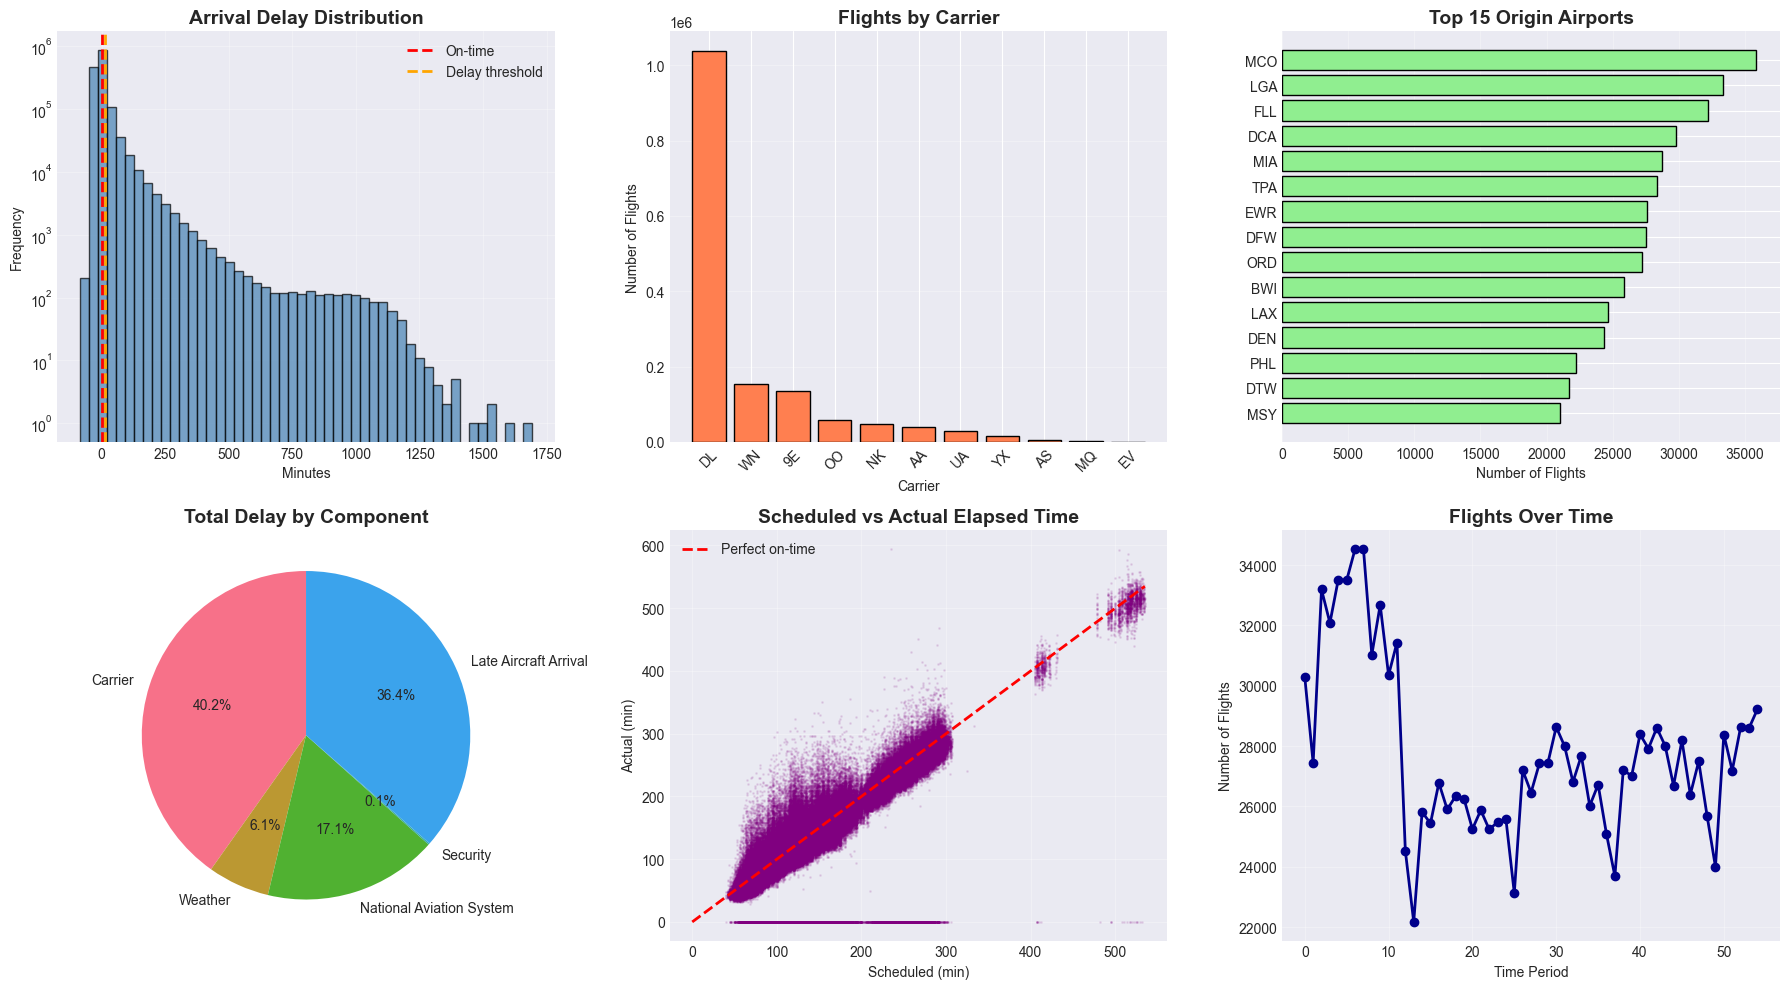

In [48]:
# Visualize data quality
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Arrival Delay Distribution
axes[0, 0].hist(df_clean['Arrival Delay (Minutes)'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_title('Arrival Delay Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Minutes')
axes[0, 0].set_ylabel('Frequency')
# axes[0, 0].set_xlim(-100, 400)
axes[0, 0].set_yscale('log')
axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='On-time')
axes[0, 0].axvline(15, color='orange', linestyle='--', linewidth=2, label='Delay threshold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Flights by Carrier
carrier_counts = df_clean['Carrier Code'].value_counts()
axes[0, 1].bar(range(len(carrier_counts)), carrier_counts.values, color='coral', edgecolor='black')
axes[0, 1].set_title('Flights by Carrier', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Carrier')
axes[0, 1].set_ylabel('Number of Flights')
axes[0, 1].set_xticks(range(len(carrier_counts)))
axes[0, 1].set_xticklabels(carrier_counts.index, rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Top 15 Origin Airports
top_airports = df_clean['Origin Airport'].value_counts().head(15)
axes[0, 2].barh(range(len(top_airports)), top_airports.values, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Top 15 Origin Airports', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Number of Flights')
axes[0, 2].set_yticks(range(len(top_airports)))
axes[0, 2].set_yticklabels(top_airports.index)
axes[0, 2].invert_yaxis()
axes[0, 2].grid(axis='x', alpha=0.3)

# 4. Delay Components Distribution
delay_cols = [
    'Delay Carrier (Minutes)',
    'Delay Weather (Minutes)',
    'Delay National Aviation System (Minutes)',
    'Delay Security (Minutes)',
    'Delay Late Aircraft Arrival (Minutes)'
]
delay_sums = df_clean[delay_cols].sum()
axes[1, 0].pie(delay_sums.values, labels=[col.replace('Delay ', '').replace(' (Minutes)', '') for col in delay_cols],
               autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Total Delay by Component', fontsize=14, fontweight='bold')

# 5. Scheduled vs Actual Elapsed Time
axes[1, 1].scatter(df_clean['Scheduled Elapsed Time (Minutes)'], 
                   df_clean['Actual Elapsed Time (Minutes)'], 
                   alpha=0.1, s=1, color='purple')
axes[1, 1].plot([0, df_clean['Scheduled Elapsed Time (Minutes)'].max()], 
                [0, df_clean['Scheduled Elapsed Time (Minutes)'].max()], 
                'r--', linewidth=2, label='Perfect on-time')
axes[1, 1].set_title('Scheduled vs Actual Elapsed Time', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Scheduled (min)')
axes[1, 1].set_ylabel('Actual (min)')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# 6. Flights over Time
df_clean['Date (YYYY-MM-DD)'] = pd.to_datetime(df_clean['Date (YYYY-MM-DD)'])
df_clean['YearMonth'] = df_clean['Date (YYYY-MM-DD)'].dt.to_period('M')
monthly_counts = df_clean.groupby('YearMonth').size()
axes[1, 2].plot(range(len(monthly_counts)), monthly_counts.values, marker='o', linewidth=2, color='darkblue')
axes[1, 2].set_title('Flights Over Time', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Time Period')
axes[1, 2].set_ylabel('Number of Flights')
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()

# Save figure
figures_dir = Path('../results/figures')
figures_dir.mkdir(parents=True, exist_ok=True)
plt.savefig(figures_dir / 'data_quality_after_preprocessing.png', dpi=300, bbox_inches='tight')
print("✓ Saved visualization to: ../results/figures/data_quality_after_preprocessing.png")
plt.show()

## 5. Export Summary Statistics

In [43]:
# Export summary for documentation
# Create summary statistics
summary_stats = {
    'Total Rows (Raw)': len(df_raw),
    'Total Rows (Clean)': len(df_clean),
    'Rows Removed': len(df_raw) - len(df_clean),
    'Total Columns': len(df_clean.columns),
    'Missing Values': df_clean.isna().sum().sum(),
    'Duplicate Rows': df_clean.duplicated().sum(),
    'Tail Number Unknown': (df_clean['Tail Number'] == 'Unknown').sum(),
    'Memory (MB)': df_clean.memory_usage(deep=True).sum() / 1024**2,
    'Date Range Start': str(df_clean['Date (YYYY-MM-DD)'].min()),
    'Date Range End': str(df_clean['Date (YYYY-MM-DD)'].max()),
    'Unique Carriers': df_clean['Carrier Code'].nunique(),
    'Unique Origin Airports': df_clean['Origin Airport'].nunique(),
    'Delayed Flights (>15 min)': (df_clean['Arrival Delay (Minutes)'] > 15).sum(),
    'On-time Flights (≤15 min)': (df_clean['Arrival Delay (Minutes)'] <= 15).sum()
}

print("\n" + "=" * 60)
print("PREPROCESSING SUMMARY STATISTICS")
print("=" * 60)
for key, value in summary_stats.items():
    if isinstance(value, float):
        print(f"{key:<30}: {value:.2f}")
    else:
        print(f"{key:<30}: {value}")

# Save summary
results_dir = Path('../results')
results_dir.mkdir(parents=True, exist_ok=True)

summary_df = pd.DataFrame([summary_stats])
summary_df.to_csv(results_dir / 'preprocessing_summary.csv', index=False)
print(f"\n✓ Summary saved to: {results_dir / 'preprocessing_summary.csv'}")

# Save detailed text summary
summary_text = f"""
================================================================================
FLIGHT DELAY DATA PREPROCESSING SUMMARY
================================================================================

DATA OVERVIEW:
--------------
  • Raw data rows:        {len(df_raw):,}
  • Cleaned data rows:    {len(df_clean):,}
  • Rows removed:         {len(df_raw) - len(df_clean):,} ({(len(df_raw) - len(df_clean))/len(df_raw)*100:.4f}%)
  • Total columns:        {len(df_clean.columns)}

DATA QUALITY:
-------------
  • Missing values:       {df_clean.isna().sum().sum():,}
  • Duplicate rows:       {df_clean.duplicated().sum():,}
  • Tail Number 'Unknown': {(df_clean['Tail Number'] == 'Unknown').sum():,}

DATASET CHARACTERISTICS:
------------------------
  • Date range:           {df_clean['Date (YYYY-MM-DD)'].min()} to {df_clean['Date (YYYY-MM-DD)'].max()}
  • Unique carriers:      {df_clean['Carrier Code'].nunique()}
  • Unique airports:      {df_clean['Origin Airport'].nunique()}
  • Memory usage:         {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB

DELAY STATISTICS:
-----------------
  • Delayed flights (>15 min):  {(df_clean['Arrival Delay (Minutes)'] > 15).sum():,} ({(df_clean['Arrival Delay (Minutes)'] > 15).mean()*100:.2f}%)
  • On-time flights (≤15 min):  {(df_clean['Arrival Delay (Minutes)'] <= 15).sum():,} ({(df_clean['Arrival Delay (Minutes)'] <= 15).mean()*100:.2f}%)
  • Mean delay:                 {df_clean['Arrival Delay (Minutes)'].mean():.2f} minutes
  • Median delay:               {df_clean['Arrival Delay (Minutes)'].median():.2f} minutes
  • Max delay:                  {df_clean['Arrival Delay (Minutes)'].max():.2f} minutes
  • Min delay:                  {df_clean['Arrival Delay (Minutes)'].min():.2f} minutes

PREPROCESSING STEPS COMPLETED:
-------------------------------
  ✓ Removed 11 rows with all critical columns missing
  ✓ Filled 1,079 missing Tail Numbers with 'Unknown'
  ✓ Removed duplicate rows (if any)
  ✓ Validated and optimized data types
  ✓ Kept outliers (Random Forest is robust to outliers)

OUTPUT FILES:
-------------
  • Cleaned data: data/processed/flight_delays_cleaned.csv
  • Summary CSV:  results/preprocessing_summary.csv
  • Visualization: results/figures/data_quality_after_preprocessing.png

NEXT STEPS:
-----------
  1. Feature Engineering (create temporal, delay, operational features)
  2. Train/Test Split
  3. Model Training (Random Forest)
  4. Model Evaluation

================================================================================
"""

with open(results_dir / 'preprocessing_summary.txt', 'w') as f:
    f.write(summary_text)
print(f"✓ Detailed summary saved to: {results_dir / 'preprocessing_summary.txt'}")


PREPROCESSING SUMMARY STATISTICS
Total Rows (Raw)              : 1527171
Total Rows (Clean)            : 1527160
Rows Removed                  : 11
Total Columns                 : 18
Missing Values                : 0
Duplicate Rows                : 0
Tail Number Unknown           : 1068
Memory (MB)                   : 401.97
Date Range Start              : 2019-01-01 00:00:00
Date Range End                : 2025-07-31 00:00:00
Unique Carriers               : 11
Unique Origin Airports        : 173
Delayed Flights (>15 min)     : 232861
On-time Flights (≤15 min)     : 1294299

✓ Summary saved to: ../results/preprocessing_summary.csv
✓ Detailed summary saved to: ../results/preprocessing_summary.txt
